# Pymaceuticals Inc.
---

### Analysis

Observations:
1. The number of mice tested for drug regimen "Capomulin" and "Ramicane" were kind of the same with at least 220. In the rest of the regimens the number of mice tested were between 160 and 190. Also,the distribution of male and female mice was very similar with 50.6% male mice and 49.4% female mice.
2. As we can observe, Capomulin and Ramicane have the smaller last tumor volume (mm3), Infubinol and Ceftamin have a similar distribution of the last tumor volume (mm3) with an approximate median of 60mm3. Infubinol have a outlier similar to Capomulin and Ramicane median. A quick analysis may suggest that due to a smaller volume of the tumor (mm3) Capomulin and Ramicane drug regimens may be more effective.
3. Since we are interested in testing Capomulin, against other treatment regimens, in our line plot we can observe that during the first 20 days the tumor´s volume increase but 15 days after the first 20 days (35 days total) tumor´s volume dramatically decrease dropping from a maximum volume of 48mm3 to a minimum volume of approximately 40.2mm3.
4. Finally in our correlation and linear regression model for mouse weight and average tumor volume for the Capomulin regimen, we get a correlation coefficient of 0.8419, this is closer to 1.0, and also, by observing it we can see a current correlation between the slope and the scatter plot. So, we can conclude that there is a dependency between the mouse weight and the tumor volume (mm3).

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_study_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
merged_mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice_IDs = merged_mouse_study_data["Mouse ID"].nunique()
unique_mice_IDs

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_by_IDs = merged_mouse_study_data[merged_mouse_study_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice_by_IDs

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID_data = merged_mouse_study_data[merged_mouse_study_data['Mouse ID'].isin(duplicate_mice_by_IDs)]
duplicate_mouseID_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_mouse_study_data = merged_mouse_study_data[merged_mouse_study_data['Mouse ID'].isin(duplicate_mouseID_data)==False]
clean_merged_mouse_study_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_unique_mice_IDs = clean_merged_mouse_study_data["Mouse ID"].nunique
clean_unique_mice_IDs()

249

## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# rename the columns for readability
# Assemble the resulting series into a single summary DataFrame.
# group the data by 'Drug Regimen'

grouped_clean_merged_mouse_study_data = clean_merged_mouse_study_data.groupby('Drug Regimen')


mean = grouped_clean_merged_mouse_study_data['Tumor Volume (mm3)'].mean()
median = grouped_clean_merged_mouse_study_data['Tumor Volume (mm3)'].median()
variance = grouped_clean_merged_mouse_study_data['Tumor Volume (mm3)'].var()
std_dev = grouped_clean_merged_mouse_study_data['Tumor Volume (mm3)'].std()
sem = grouped_clean_merged_mouse_study_data['Tumor Volume (mm3)'].sem()


summary_statistics_2 = pd.DataFrame({'Mean Tumor Volume': mean,
                        'Median Tumor Volume': median,
                        'Tumor Volume Variance': variance,
                        'Tumor Volume Std. Dev.': std_dev,
                        'Tumor Volume SEM': sem})


summary_statistics_2

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_statistics_3 = clean_merged_mouse_study_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem']) 
summary_statistics_3


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

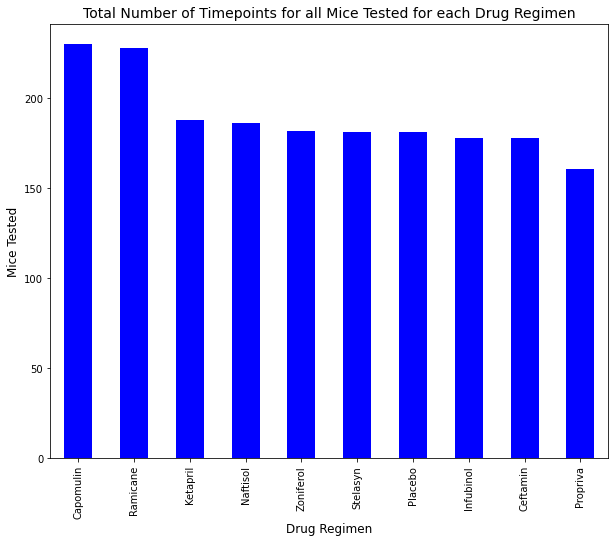

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested_drug_regimen = clean_merged_mouse_study_data["Drug Regimen"].value_counts()

bar_plot_tntp = mice_tested_drug_regimen.plot(kind='bar', color='blue', figsize=(10, 8))  

bar_plot_tntp.set_title('Total Number of Timepoints for all Mice Tested for each Drug Regimen', fontsize=14)
bar_plot_tntp.set_xlabel('Drug Regimen', fontsize=12)
bar_plot_tntp.set_ylabel('Mice Tested', fontsize=12)

bar_plot_tntp



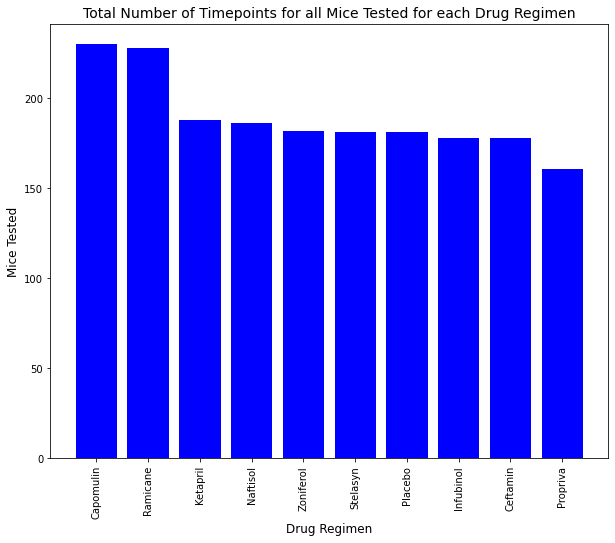

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_tested_drug_regimen_pyplot = clean_merged_mouse_study_data["Drug Regimen"].value_counts()
x_axis_drug_regimen = mice_tested_drug_regimen_pyplot.index.values
y_axis_mice_tested = mice_tested_drug_regimen_pyplot.values

plt.figure(figsize=(10, 8))
plt.bar(x_axis_drug_regimen, y_axis_mice_tested, color='blue')

plt.title('Total Number of Timepoints for all Mice Tested for each Drug Regimen', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Mice Tested', fontsize=12)

plt.xticks(rotation=90)
plt.show()



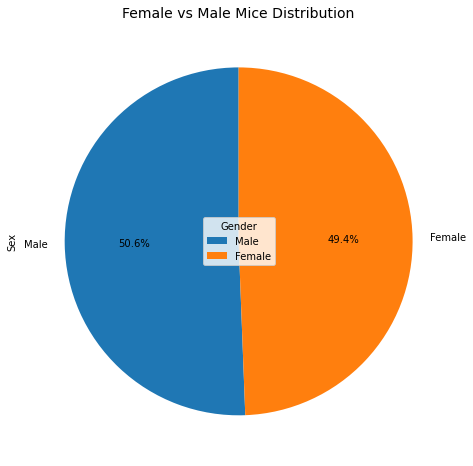

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male_pie_plot = clean_merged_mouse_study_data['Sex'].value_counts()
pie_plot_f_vs_m = female_vs_male_pie_plot.plot(kind='pie', autopct='%1.1f%%' , figsize=(10, 8), startangle=90)  

pie_plot_f_vs_m.set_title('Female vs Male Mice Distribution', fontsize=14)
pie_plot_f_vs_m.legend(title='Gender', loc='center')

pie_plot_f_vs_m


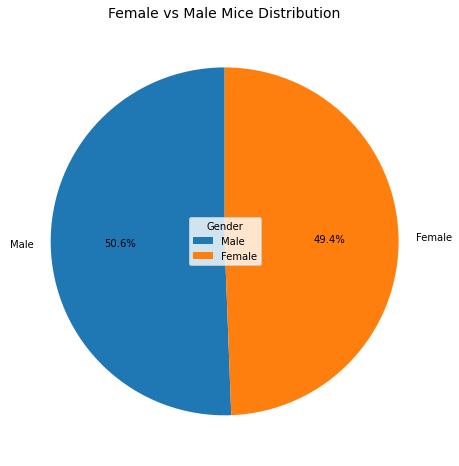

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_vs_male_pie_plot_pyplot = clean_merged_mouse_study_data['Sex'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(female_vs_male_pie_plot_pyplot.values, labels=female_vs_male_pie_plot_pyplot.index, autopct='%1.1f%%', startangle=90)

plt.title('Female vs Male Mice Distribution', fontsize=14)
plt.legend(title='Gender', loc='center')

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

treatments_regimens_filter_df = clean_merged_mouse_study_data[(clean_merged_mouse_study_data['Drug Regimen'] == 'Capomulin') | 
        (clean_merged_mouse_study_data['Drug Regimen'] == 'Ramicane') | 
        (clean_merged_mouse_study_data['Drug Regimen'] == 'Infubinol') | 
        (clean_merged_mouse_study_data['Drug Regimen'] == 'Ceftamin')]


grouped_by_mouseID = treatments_regimens_filter_df.groupby("Mouse ID")
last_timepoint = grouped_by_mouseID["Timepoint"].max()

merged_grouped_df = pd.merge(last_timepoint, treatments_regimens_filter_df, on=["Mouse ID", "Timepoint"], how="left")

last_tumor_volumes = merged_grouped_df[["Mouse ID", "Tumor Volume (mm3)"]]
last_tumor_volumes


,Mouse ID,Tumor Volume (mm3)
0,a203,67.973419
1,a251,65.525743
2,a275,62.999356
3,a411,38.407618
4,a444,43.047543
...,...,...
95,y769,68.594745
96,y793,31.896238
97,y865,64.729837
98,z578,30.638696


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volume
for treatment in treatments_list:
    located_data = merged_grouped_df.loc[merged_grouped_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # add subset 
    subset = []
    subset.append(located_data)
    
    q1 = located_data.quantile(0.25)
    q3 = located_data.quantile(0.75)
    iqr = q3 - q1

    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    outliers = located_data[(located_data < lower_bound) | (located_data > upper_bound)]

    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


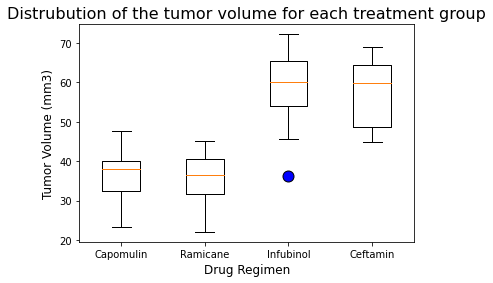

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
for treatment in treatments_list:
    tumor_vol = merged_grouped_df.loc[merged_grouped_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_vol)
    
# Generate the box plot
fig1, ax1 = plt.subplots()
ax1.set_title("Distrubution of the tumor volume for each treatment group", fontsize =16)
ax1.set_xlabel("Drug Regimen", fontsize =12)
ax1.set_ylabel("Tumor Volume (mm3)", fontsize =12)

# Add the data to the plot
bp = ax1.boxplot(tumor_volume_data, labels=treatments_list, showfliers=True)
for flier in bp['fliers']:
    flier.set(marker='o', markersize=11, markerfacecolor='blue', alpha=1)
# Show the plot
plt.show()


## Line and Scatter Plots

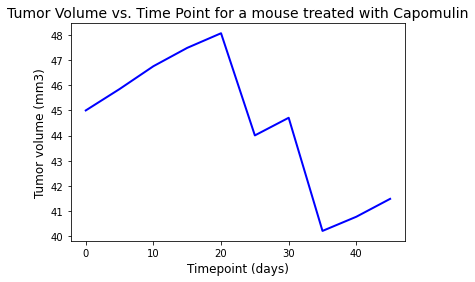

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_merged_mouse_study_data.loc[clean_merged_mouse_study_data["Drug Regimen"] == "Capomulin"]
mouse_capomulin  = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
x_axis = mouse_capomulin ["Timepoint"]
size = mouse_capomulin ["Tumor Volume (mm3)"]

f1, ax1 = plt.subplots()
plt.title('Tumor Volume vs. Time Point for a mouse treated with Capomulin', fontsize =14)
plt.plot(x_axis, size, linewidth=2, markersize=15, color="blue", label="Tumor Volume")
plt.xlabel('Timepoint (days)', fontsize =12)
plt.ylabel('Tumor volume (mm3)', fontsize =12)
plt.show()

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

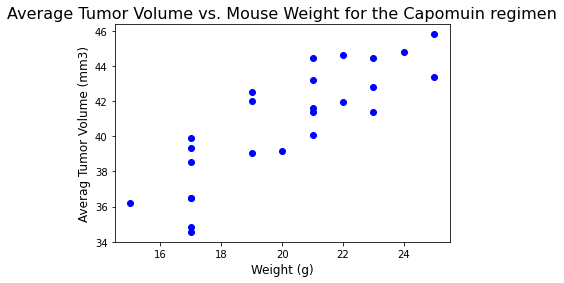

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomuin regimen
average_volume =capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(average_volume['Weight (g)'],average_volume['Tumor Volume (mm3)'], color="blue")
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomuin regimen', fontsize =16)
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Averag Tumor Volume (mm3)', fontsize =12 )


## Correlation and Regression

Correlation coefficient: 0.8419363424694716


Text(0, 0.5, 'AveragevTumor Volume (mm3)')

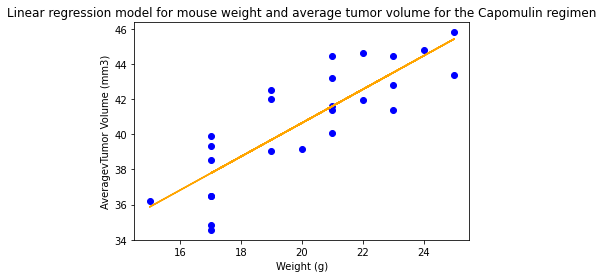

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(average_volume['Weight (g)'], average_volume['Tumor Volume (mm3)'])[0]
print('Correlation coefficient:', correlation)

plt.scatter(average_volume['Weight (g)'],average_volume['Tumor Volume (mm3)'], color="blue")

slope, intercept, rvalue, pvalue, stderr = linregress(average_volume["Weight (g)"], average_volume["Tumor Volume (mm3)"])
regression_values = average_volume["Weight (g)"] * slope + intercept
plt.plot(average_volume["Weight (g)"], regression_values, color='orange')

plt.title("Linear regression model for mouse weight and average tumor volume for the Capomulin regimen", fontsize =12 )
plt.xlabel("Weight (g)", fontsize =10)
plt.ylabel("AveragevTumor Volume (mm3)", fontsize =10)
